Загрузим и отчистим даныные о больных

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv("liver.csv")
df.duplicated().where(lambda x: x == True).dropna() ##  Явных дубликатов не найдено
df = df.dropna().reset_index()

# for col in df.columns:
#     print(df[col].unique())

df["Gender"] = df["Gender"].replace("Mal","Male")
df["Gender"] = df["Gender"].replace(["Male","Female"],[0,1])
df["Dataset123"] = df["Dataset123"].replace(["yes","no"],["1","2"])
df["Dataset123"] = df["Dataset123"].replace(["1","2"],["1","0"])
df["Aspartate_Aminotransferase"] = df["Aspartate_Aminotransferase"].replace("3a4","34")
df = df.rename(columns={"Dataset123":"IsSick"})
df = df.astype({
    'Gender':'int64',
    "IsSick":"int64",
    "Alkaline_Phosphotase":"int64",
    "Aspartate_Aminotransferase":"int64"})
df.head()


,index,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,IsSick
0,0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Построим точечные диаграммы рассеяния 
1. Общий билирубин от  прямого билирубиа
2. Аламиноаминотрансфераза от Аспартатаминотрансферазы
3. Белков от альбумина

<AxesSubplot: xlabel='Albumin', ylabel='Total_Protiens'>

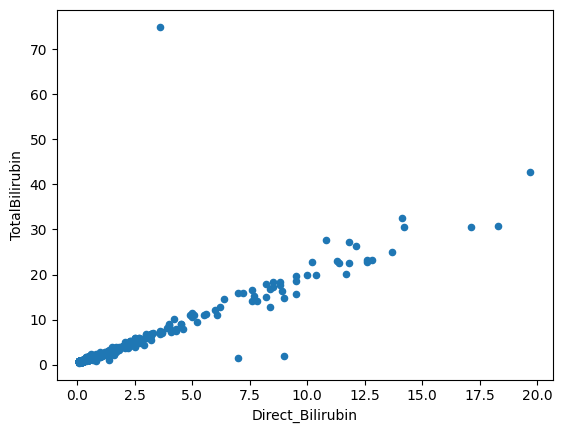

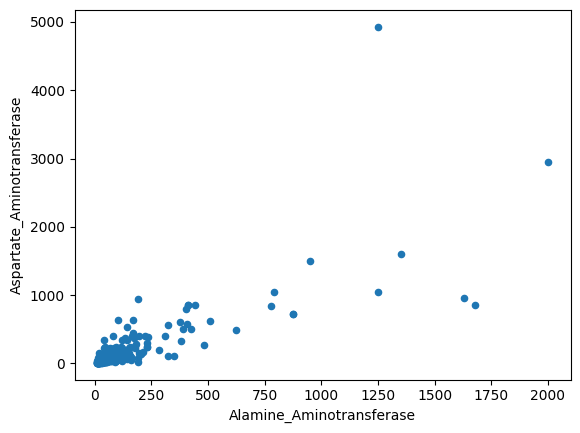

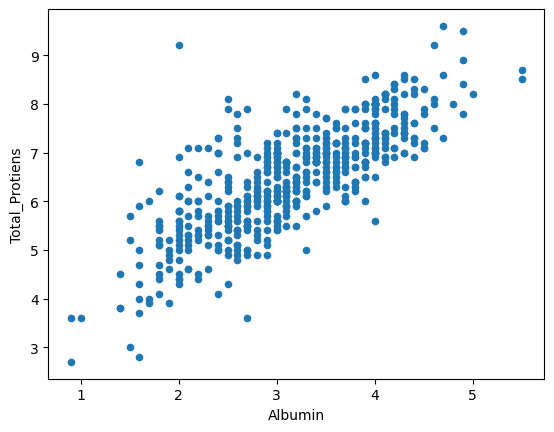

In [17]:
df.plot(x='Direct_Bilirubin',y='TotalBilirubin',kind='scatter')
df.plot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',kind='scatter')
df.plot(x='Albumin',y='Total_Protiens',kind='scatter')

Построим матрицу рассеивания для всех показателей и проанализируем ее

array([[<AxesSubplot: xlabel='index', ylabel='index'>,
        <AxesSubplot: xlabel='Age', ylabel='index'>,
        <AxesSubplot: xlabel='Gender', ylabel='index'>,
        <AxesSubplot: xlabel='TotalBilirubin', ylabel='index'>,
        <AxesSubplot: xlabel='Direct_Bilirubin', ylabel='index'>,
        <AxesSubplot: xlabel='Alkaline_Phosphotase', ylabel='index'>,
        <AxesSubplot: xlabel='Alamine_Aminotransferase', ylabel='index'>,
        <AxesSubplot: xlabel='Aspartate_Aminotransferase', ylabel='index'>,
        <AxesSubplot: xlabel='Total_Protiens', ylabel='index'>,
        <AxesSubplot: xlabel='Albumin', ylabel='index'>,
        <AxesSubplot: xlabel='Albumin_and_Globulin_Ratio', ylabel='index'>,
        <AxesSubplot: xlabel='IsSick', ylabel='index'>],
       [<AxesSubplot: xlabel='index', ylabel='Age'>,
        <AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='Gender', ylabel='Age'>,
        <AxesSubplot: xlabel='TotalBilirubin', ylabel='Age'>,
        <Axe

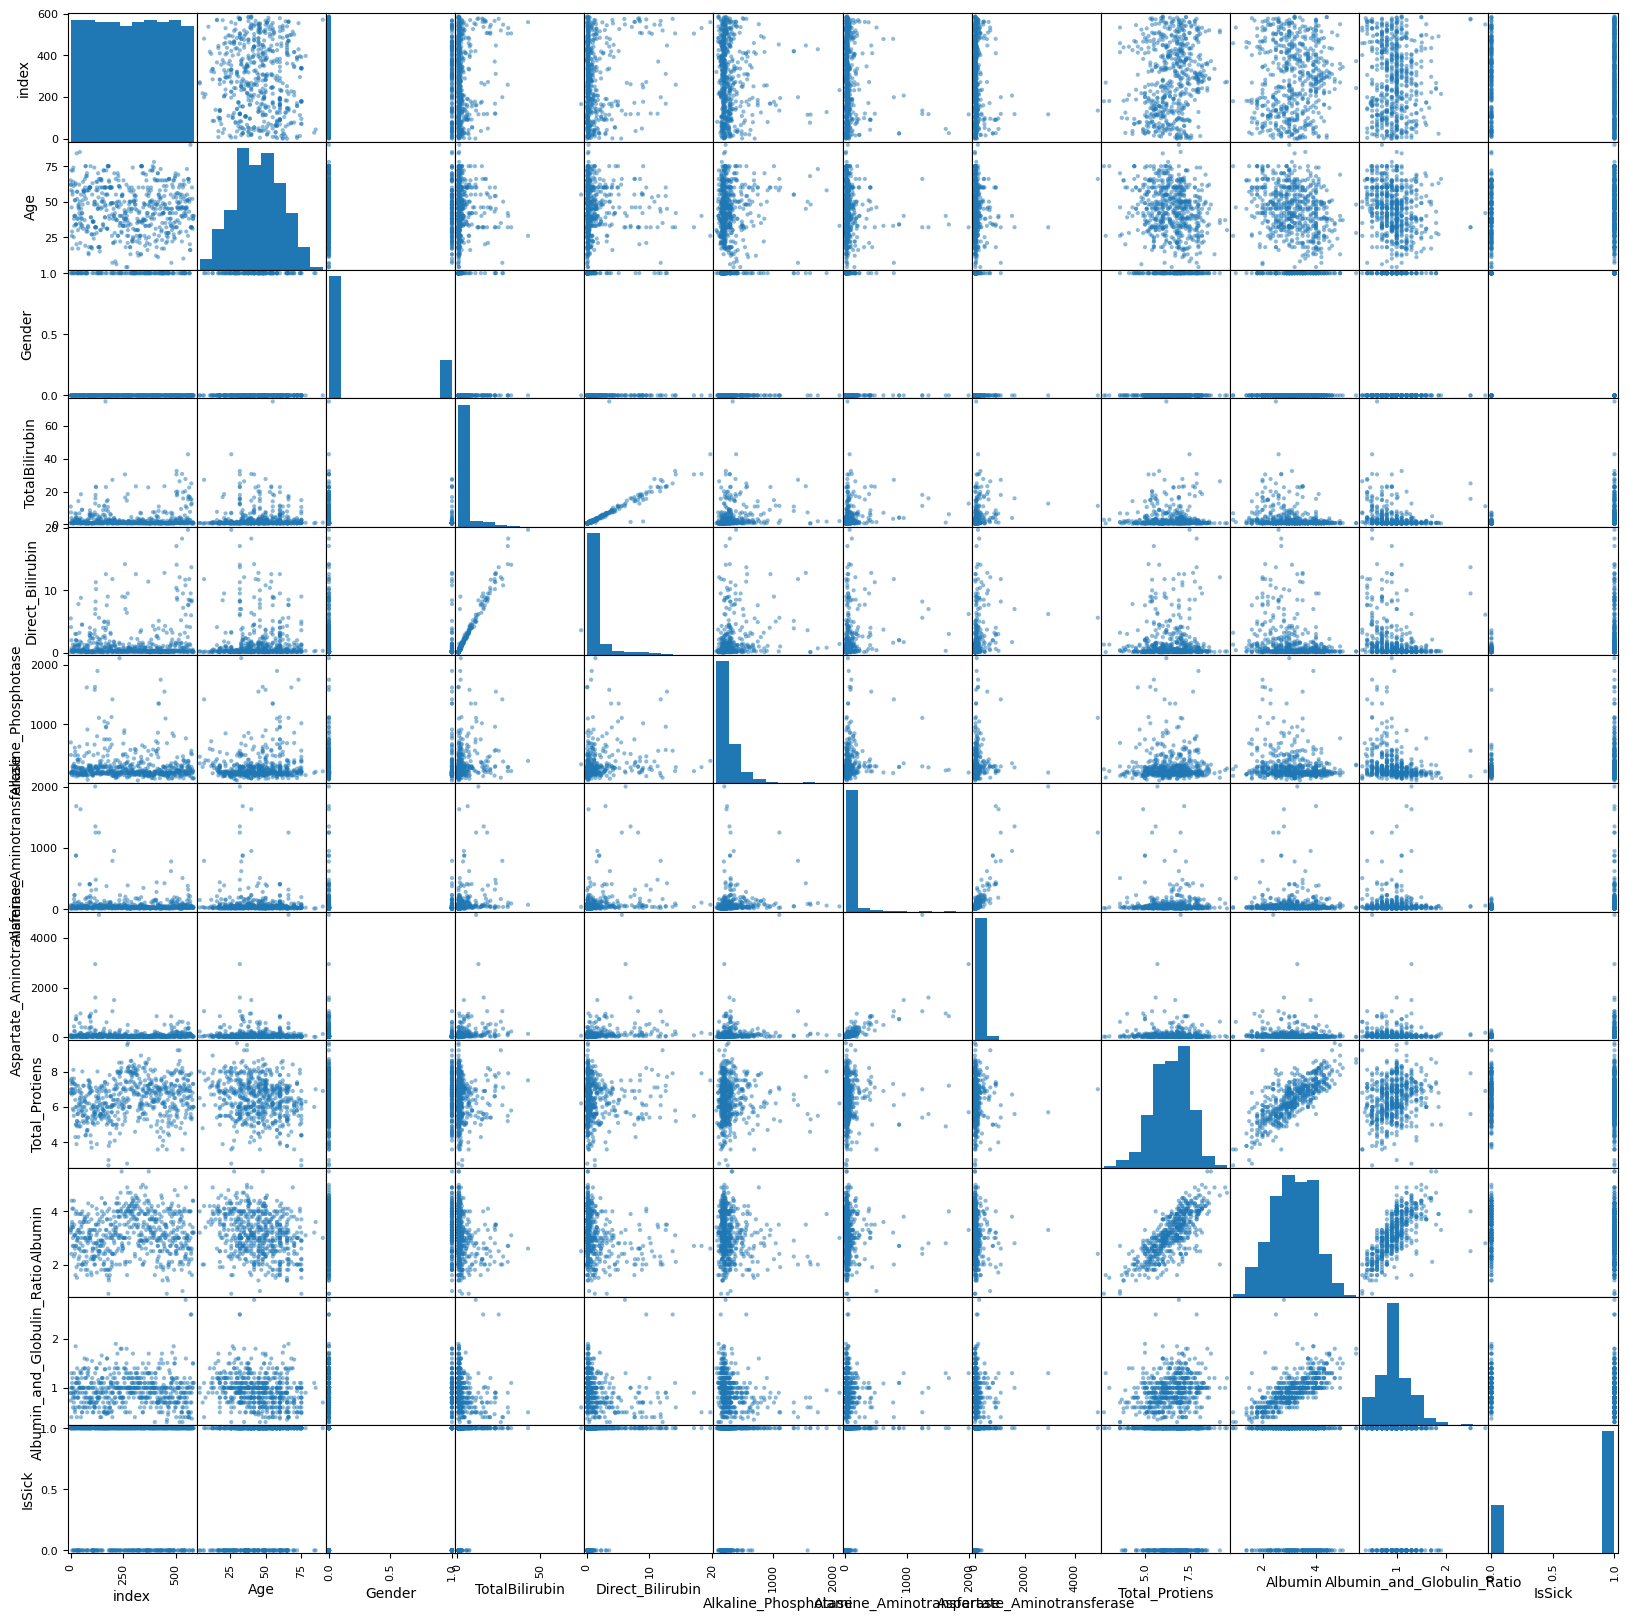

In [22]:
pd.plotting.scatter_matrix(df,figsize=(20,20))

#### Анализ матрицы
Из графика выше отчетлива видна прямая зависимость прямого и общего билирубина, также можно увидеть не на столько явную сильную, но все же зависимость аламиноаминотрансферазы от аспартатаминотрансферазы
Так же с помощью этого графика мы может увидеть, что у большисинства людей общий билирубин не выходит за пределы 25 ед, в то время как прямой  редко выходит за пределы 10 ед. Так же заметно и то что щелочная фосфатаза обычно для всех держится в пределах 1000 ед, за редким исключением. Можем проверить эти выводы с помощью df.describe()

In [14]:
df.describe() 

,index,Age,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,580.000000,580.000000,580.00000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,291.862069,44.781034,3.30569,1.489310,290.322414,81.020690,110.181034,6.481034,3.143276,0.949914
std,169.420107,16.203541,6.22422,2.815174,243.158195,183.040063,289.635123,1.084330,0.793784,0.319282
min,0.000000,4.000000,0.40000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,144.750000,33.000000,0.80000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,292.500000,45.000000,1.00000,0.300000,208.000000,35.000000,41.500000,6.600000,3.100000,0.955000
75%,438.250000,58.000000,2.60000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000
max,586.000000,90.000000,75.00000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000
